In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from rdkit import Chem
%matplotlib inline

In [16]:
homedir = os.path.dirname(os.path.realpath('__file__'))
homedir = homedir+"/data/"
df = pd.read_csv(homedir+"tox_niehs_all.csv")

In [17]:
df.head()

,CASRN,Canonical_QSARr,Chemical_Name,DTXSID,Extraneous_SMILES,InChI_Code_QSARr,InChI_Key_QSARr,Salt_Solvent,Structure_Source,epa,ghs,id,ld50,logld50,nontoxic,smiles,verytoxic
0,100-35-6,CCN(CCCl)CC,"Ethanamine, 2-chloro-N,N-diethyl-",DTXSID8043868,NaN,"InChI=1S/C6H14ClN/c1-3-8(4-2)6-5-7/h3-6H2,1-2H3",YMDNODNLFSHHCV-UHFFFAOYSA-N,?,EPA_DSSTox,0.0,1.0,molid12,33.500000,3.372618,0.0,CCN(CC)CCCl,1.0
1,1003-40-3,NC1C=CN=CC=1,"Pyridine, 4-amino-, hydrochloride",DTXSID70143115,NaN,"InChI=1S/C5H6N2/c6-5-1-3-7-4-2-5/h1-4H,(H2,6,7)",NUKYPUAOHBNCPY-UHFFFAOYSA-N,Cl,EPA_DSSTox,0.0,1.0,molid52,23.000000,3.052397,0.0,Nc1ccncc1,1.0
2,10049-60-2,CCC(C)N,NaN,NaN,NaN,"InChI=1S/C4H11N/c1-3-4(2)5/h4H,3,5H2,1-2H3",BHRZNVHARXXAHW-UHFFFAOYSA-N,[Cl-],Public_CrossChecked,2.0,3.0,molid63,1745.333333,6.971154,0.0,CCC(C)N,0.0
3,10061-01-5,ClC=CCCl,(Z)-Dichloropropene,DTXSID1032305,NaN,"InChI=1S/C3H4Cl2/c4-2-1-3-5/h1-2H,3H2",UOORRWUZONOOLO-UHFFFAOYSA-N,?,EPA_DSSTox,1.0,2.0,molid70,96.000000,4.552809,0.0,ClC=CCCl,0.0
4,10326-41-7,CC(O)C(O)=O,D-Lactic acid,DTXSID0047030,NaN,"InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6)",JVTAAEKCZFNVCJ-UHFFFAOYSA-N,?,EPA_DSSTox,2.0,4.0,molid256,3182.250000,8.041970,1.0,CC(O)C(=O)O,0.0


# Construct Internal Test Set

In [18]:
size = 0.10
seed = 6
np.random.seed(seed)

In [19]:
msk = np.random.rand(len(df)) < 0.1
df_tv = df[~msk]
df_int = df[msk]

In [20]:
print(df.shape, df_tv.shape, df_int.shape)

(8380, 17) (7552, 17) (828, 17)


In [21]:
df_tv.to_csv(homedir+'tox_niehs_all_trainval.csv', index=False)
df_int.to_csv(homedir+'tox_niehs_all_int.csv', index=False)

# Evaluate Dataset Characteristics

In [22]:
import matplotlib.pyplot as plt

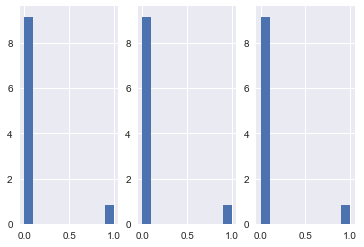

In [23]:
task = 'verytoxic'

fig, axes = plt.subplots(nrows=1, ncols=3)

df[task].hist(normed=True, ax=axes[0])
df_tv[task].hist(normed=True, ax=axes[1])
df_int[task].hist(normed=True, ax=axes[2])

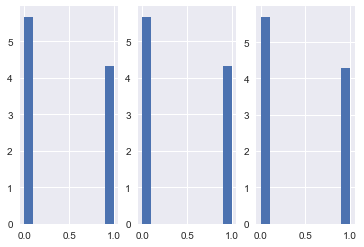

In [24]:
task = 'nontoxic'

fig, axes = plt.subplots(nrows=1, ncols=3)

df[task].hist(normed=True, ax=axes[0])
df_tv[task].hist(normed=True, ax=axes[1])
df_int[task].hist(normed=True, ax=axes[2])

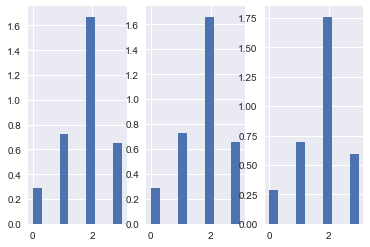

In [25]:
task = 'epa'

fig, axes = plt.subplots(nrows=1, ncols=3)

df[task].hist(normed=True, ax=axes[0])
df_tv[task].hist(normed=True, ax=axes[1])
df_int[task].hist(normed=True, ax=axes[2])

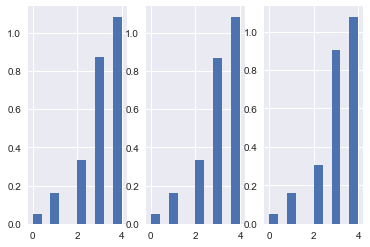

In [26]:
task = 'ghs'

fig, axes = plt.subplots(nrows=1, ncols=3)

df[task].hist(normed=True, ax=axes[0])
df_tv[task].hist(normed=True, ax=axes[1])
df_int[task].hist(normed=True, ax=axes[2])

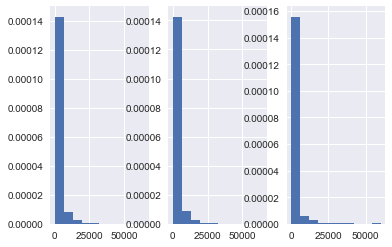

In [27]:
task = 'ld50'

fig, axes = plt.subplots(nrows=1, ncols=3)

df[task].hist(normed=True, ax=axes[0])
df_tv[task].hist(normed=True, ax=axes[1])
df_int[task].hist(normed=True, ax=axes[2])

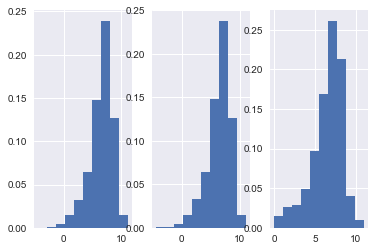

In [28]:
task = 'logld50'

fig, axes = plt.subplots(nrows=1, ncols=3)

df[task].hist(normed=True, ax=axes[0])
df_tv[task].hist(normed=True, ax=axes[1])
df_int[task].hist(normed=True, ax=axes[2])